#`pandas`
`pandas` is a Python *library*, a collection of functions and objects that allow you to do one thing. In the case of `pandas`, that thing is statistical data analysis.


### Setting up
First, we need to tell Python that we want to use `pandas`. We do that with the `import` statement. Because we are lazy and don't want to type *`pandas`* everytime we call the library, we can tell Python that we'll refer to the library by an alias, which by convention is `pd`. 

If you are not as lazy, you can leave out the `as pd` part. Although in principle, you can alias the library to whathever you want (e.g., `import pandas as endangered_species`), it makes for more readable code if you stick to the accepted conventions for common libraries such as `pandas`.

In [3]:
%matplotlib inline
# use the pandas library, and abbreviate it as 'pd'
import pandas as pd

### Introducing the `DataFrame`
The main object that we use from `pandas` is the `DataFrame`. You can think of it as a giant table with a lot of fancy options.
In it's simplest form, the rows as columns of the `DataFrame` are simply numbered, and the table holds the data. This is also called a *matrix*.

In [4]:
pd.DataFrame([7, 9, 13])

,0
0,7
1,9
2,13


If you are working with a lot of data, it can become tedious to remember which column stood for, say *average household income*, and you'll end up having tons of post-its around your workplace. `pandas` can help you unclutter your data scientist life by providing the option to name the rows and columns. All you need to do is provide the names as lists to the keywords `index` (for the row names) and `columns` (for, well, the columns). Like so (if the data is a single element, `pandas` just assumes you would like to fill the whole table with it):

In [5]:
pd.DataFrame(0, index=list('ROWS'), columns=list('COLUMNS'))

,C,O,L,U,M,N,S
R,0,0,0,0,0,0,0
O,0,0,0,0,0,0,0
W,0,0,0,0,0,0,0
S,0,0,0,0,0,0,0


Normally, you don't want just one value everywhere, but some real data. You can provide that data via a list of lists, where each element in the outer list is a row, and each element in those row lists is a column.

In [6]:
observations = [[3, 2, 2], [2, 5, 10], [2, 7, 3]]
pd.DataFrame(observations)

,0,1,2
0,3,2,2
1,2,5,10
2,2,7,3


#### Labeling columns and indices
Again, this is a bit hard to interpret, so let's index our `DataFrame` meaningfully. Let's say each column contains the number of creatures we've seen on one of our walks in the Amager wilderness. So far, we've seen cranes, deers, and golfers. 

In [7]:
pd.DataFrame(observations, columns=['crane', 'deer', 'golfer'])

,crane,deer,golfer
0,3,2,2
1,2,5,10
2,2,7,3


Better! That still leaves the rows. Usually we go on our walks on Mondays, Tuesdays, and Thursdays (Wednesday being our day of rest), so let's annotate the rows with that.

In [8]:
daily_walks = pd.DataFrame(observations, columns=['crane', 'deer', 'golfer'],
             index=['monday', 'tuesday', 'thursday'])
daily_walks

,crane,deer,golfer
monday,3,2,2
tuesday,2,5,10
thursday,2,7,3


***Exercise:*** Now it's your turn! Create a `DataFrame` with at least 2 columns and 2 rows. Name both rows and columns, and fill them with different values.

In [9]:
# YOUR CODE HERE

#### Selecting a single column
Say we are only interested in our crane-spotting experience. `pandas` let's us select a simple column of the `DataFrame` simply by accessing it via the name we gave it (the dot between the name of the frame and the column means that this is an element of the frame). How convenient!

In [10]:
daily_walks.crane

monday      3
tuesday     2
thursday    2
Name: crane, dtype: int64

Instead, we can also use the same indexing as we've seen with lists, name by using `[]`.

***Exercise:*** Use the list notation to get the *crane* column.

In [11]:
# YOUR CODE HERE

#### Selecting multiple columns
If we want to sub-select more than one column, we can't use the *dot operator* anymore, but we have to use the list notation. However, instead of one name, we now provide a list of the column names we are interested in.

In [12]:
daily_walks[['crane', 'deer']]

,crane,deer
monday,3,2
tuesday,2,5
thursday,2,7


### Summary statistics
One of the great advantages of `pandas` is that you can get descriptive statistics over the data. Most of them are fairly self-explanatory. Note that we get the aggregate over each *column*.

In [13]:
daily_walks.sum()

crane      7
deer      14
golfer    15
dtype: int64

In [14]:
daily_walks.mean()

crane     2.333333
deer      4.666667
golfer    5.000000
dtype: float64

`pandas` also provides a more comprehensive analysis of the data. The function `describe()` will extract and summarize some of the basic statistical measures in one fell swoop.

In [15]:
daily_walks.describe()

,crane,deer,golfer
count,3.000000,3.000000,3.000000
mean,2.333333,4.666667,5.000000
std,0.577350,2.516611,4.358899
min,2.000000,2.000000,2.000000
25%,2.000000,3.500000,2.500000
50%,2.000000,5.000000,3.000000
75%,2.500000,6.000000,6.500000
max,3.000000,7.000000,10.000000


### Transposing (changing rows to columns)
As we have seen before, the descriptive statistics are calculated over the columns. What if we were interested in knowing how many creatures we saw on a given day instead? We'd have to switch the rows and columns. Sounds like a lot of hassle and nested `for`-loops, but fret not, because there is a built-in function that does it for you. The process of swapping rows and columns is called **transposing** in linear algebra, and so the function in `pandas` is helpfully called `transpose()`.

In [16]:
daily_walks.transpose()

,monday,tuesday,thursday
crane,3,2,2
deer,2,5,7
golfer,2,10,3


Transposing is a surprisingly common, and since we are lazy (see above), `pandas` provides a shorthand, namely the letter `T`. This also comes from linear algebra, where the transpose of a matrix is often written as $X^T$.

The result of transposing the `DataFrame` is another `DataFrame`, and we can simply execute all the functions we want on that. So let's transpose and then sum over the days.

In [17]:
daily_walks.T.sum()

monday       7
tuesday     17
thursday    12
dtype: int64

***Exercise:*** Get the mean, median, and description for the transposed `DataFrame`.

In [18]:
# YOUR CODE HERE

### Missing observations

Life is messy, and often times, your data is too. For various reasons, we often have to work with whatever data we have, and more often than not, some information will be missing. Let's simulate that here, by setting one of the observations to `None`.

In [19]:
observations[2][1] = None

Now, we can create a new `DataFrame` that has a missing value.

In [20]:
confused_daily_walks = pd.DataFrame(observations, columns=['crane', 'deer', 'golfer'],
             index=['monday', 'tuesday', 'thursday'])
confused_daily_walks

,crane,deer,golfer
monday,3,2,2
tuesday,2,5,10
thursday,2,NaN,3


Apparently, `pandas` can handle missing values in displaying the data. Next, let's see what we can do when it comes to using missing values in descriptive statistics.

***Exercise:*** compute the mean values for the corrupted data.

In [21]:
# YOUR CODE HERE

#### Dropping missing rows
Maybe, we don't want to have those days with missing values in our data. At all. In that case, we could simply drop all rows that contain a missing value.

In [22]:
confused_daily_walks.dropna()

,crane,deer,golfer
monday,3,2,2
tuesday,2,5,10


***Exercise:*** What if we want all days, but drop all creatures for which we have missing values?

In [23]:
# YOUR CODE HERE

#### Making up likely missing values
Throwing entire entries away can be pretty radical, and depending on sparse your observations matrix is, you might end up with very little to go on.

Instead, it can be a good idea to impute a value to replace those missing values. 
The simplest way is to assume a minimum value, say 1, and just use that. Like so:

In [24]:
confused_daily_walks.fillna(1)

,crane,deer,golfer
monday,3,2,2
tuesday,2,5,10
thursday,2,1,3


This is better than nothing, but still a bit blunt. Maybe we can make use of the fact that we know some values, and the fact that we can compute statistics over them. That let's us fill missing values with an average:

In [25]:
confused_daily_walks.fillna(confused_daily_walks.deer.mean())

,crane,deer,golfer
monday,3,2.0,2
tuesday,2,5.0,10
thursday,2,3.5,3


### Indexing
So far, we were ony interested in columns, and used the `transpose()` function if we wanted rows instead. With large matrices, this approach can become too slow, so let's look at other ways to retrive rows.

#### By location `.iloc`
`iloc` let's us specify a row, and returns just that. However, it only takes positinal arguments, not names.

In [26]:
daily_walks.iloc[0]

crane     3
deer      2
golfer    2
Name: monday, dtype: int64

#### Using `.ix` method
The `ix` method is somewhat more convenient, since we can choose.

`ix` can use either names or positions to retrive rows:

In [27]:
daily_walks.ix['monday']

crane     3
deer      2
golfer    2
Name: monday, dtype: int64

In [28]:
daily_walks.ix[0]

crane     3
deer      2
golfer    2
Name: monday, dtype: int64

We can also get specific data cells, i.e., a combination of a row and a column. You can mix names and positions. Note that you need to ***first*** give it the row, then the column, though.

In [29]:
daily_walks.ix['monday', 'crane']

3

In [30]:
daily_walks.ix[0:2, ['crane', 'deer']]

,crane,deer
monday,3,2
tuesday,2,5


### Data from files
`pandas` also provides some nifty functions to read data from files. A common format is the ***CSV*** (commma-separated values) format, which separates fields by a special ***separator token***, usually a comma.

Let's take some data about Nobel Prize winners from [Weinberg et al. 2011](http://www.ncbi.nlm.nih.gov/pmc/articles/PMC3223465/#!po=70.0000). The raw file looks like this:

In [31]:
!head nobel_prize_winners_age.csv

In order to get this into a nice `DataFrame`, pandas provides the `read_csv()` function. All you have to give it is a name. By default, it will assume that the separator is a comma. However, here, we have commas as parts of some of the fields (e.g., when several people got the prize), so the file use a semicolon instead. Luckily, we can tell `pandas` about that via the `sep=` keyword.

The original file is pretty large, so in order to see whether it works, we only peak at the top 5 lines. For this, we can use the `head()` function (the command is the same in the shell, as you can see in the cell above).

In [32]:
winners = pd.read_csv("nobel_prize_winners_age.csv", sep=";")
winners.head()

,name,field,year_birth,year_prize,year_research_mid,year_death,TheoryOrTheoryAndEmpirical,age_highdegree
0,"Van'T Hoff, Jacobus Henricus",Chemistry,1852,1901,1885,1911,1,22
1,"Fischer, Hermann Emil",Chemistry,1852,1902,1895,1919,0,22
2,"Arrhenius, Svante August",Chemistry,1859,1903,1884,1927,1,25
3,"Ramsay, Sir William",Chemistry,1852,1904,1894,1916,0,20
4,"Von Baeyer, Johann",Chemistry,1835,1905,1873,1917,0,23


Now that we have all that data in a `DataFrame`, we can use all the `pandas` functions we have seen before.

***Exercise:*** What is the average age for `age_highdegree`?

In [33]:
# YOUR CODE HERE

### Histogram
`pandas` also provides easy functions to visualize the data. One of the most usefuls is the `hist()` function, which gives us a histogram of the data, i.e., how many entries we have for each value. The semicolon at the end is just there to suppress some irrelevant output in the notebook setting (go ahead and remove it to see the difference).

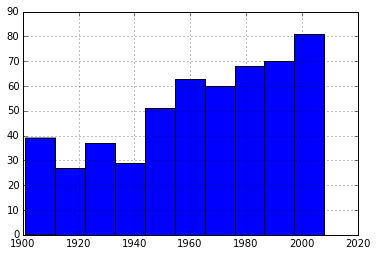

In [34]:
winners.year_prize.hist();

***Exercise:*** plot a histogram of the birth years (`year_birth`).

In [35]:
# YOUR CODE HERE

The values we need for histograms (the counts per value) can be accessed by a separate function, aptly named `value_counts()`.

In [36]:
number_of_winners_per_year = winners.year_prize.value_counts()
number_of_winners_per_year.head()

2008    9
2002    9
2001    9
2000    9
1988    9
dtype: int64

This creates a new `DataFrame` object, named `number_of_winners_per_year`.
You might have noted that the values are not sorted (which would make for a pretty bad histogram). In order to sort them, we can use `sort_index()` on the counts:

In [37]:
sorted_number_of_winners_per_year = number_of_winners_per_year.sort_index()
sorted_number_of_winners_per_year.head()

1901    3
1902    4
1903    5
1904    3
1905    3
dtype: int64

***Exercise:*** Get the value counts for the fields.

In [38]:
# YOUR CODE HERE

##Plotting
With the data we computed via counting and sorting, we can also produce a neat plot, which tracks the exact number of winners over time. It's as easy as calling `plot()` on our sorted `DataFrame` of value counts.

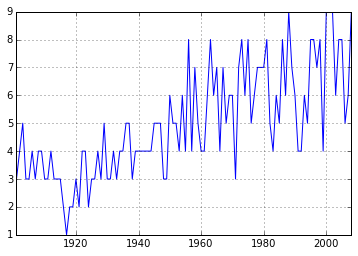

In [39]:
sorted_number_of_winners_per_year.plot();

### Defining new variables
Sometimes, there are values we are interested in that can be computed from the existing ones. Let's compute how old the winners were at the time they received the prize, and how many years it took them from getting their degree until they received the prize.

In order to add a new column to an existing `DataFrame`, we need to use the list notation (after we added a new column, we can use the dot notation).

In [40]:
winners['age_at_prize'] = winners.year_prize - winners.year_birth
winners['degree_to_prize'] = winners.year_prize - (winners.year_birth + winners.age_highdegree)

***Exercise:*** Find the minimum and maximum values of the two new columns.

In [41]:
# YOUR CODE HERE

### Finding the minimum position
Sometimes, we are not interested in the minum ***value***, but in the position at which it occurs. Instead of the `min()` function, we use `argmin()`. The return value is an index of the `DataFrame`, which we can then retrive:

In [42]:
index_of_youngest = winners.age_at_prize.argmin()
winners.ix[index_of_youngest]

name                          Bragg, William Lawrence
field                                         Physics
year_birth                                       1890
year_prize                                       1915
year_research_mid                                1912
year_death                                       1942
TheoryOrTheoryAndEmpirical                          0
age_highdegree                                     22
age_at_prize                                       25
degree_to_prize                                     3
Name: 362, dtype: object

***Exercise:*** Add a column `age_at_death`.

In [43]:
# YOUR CODE HERE

***Exercise:*** What is the name of the winner who died the youngest?

In [44]:
# YOUR CODE HERE

### Boxplots
In statistical analysis, it can be informative to look at the ***spread*** of variables. One of the standard visualizations for this is the boxplot (with whiskers). The red line gives us the median value, the box covers 50 % of the data points, and the whiskers give us the minimum and maximum.

55.0
25
88


/Users/anders/anaconda/envs/py34/lib/python3.4/site-packages/pandas/tools/plotting.py:2633: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  warnings.warn(msg, FutureWarning)


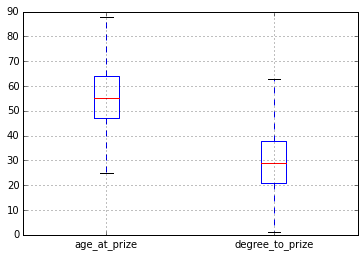

In [45]:
winners[['age_at_prize', 'degree_to_prize']].boxplot();
print(winners.age_at_prize.median())
print(winners.age_at_prize.min())
print(winners.age_at_prize.max())